In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read data
dt=pd.read_csv("diabetic_data.csv")

In [3]:
# Categorical and Continuous data
print("There are ", len(dt.select_dtypes(include=['object']).columns), "object variables")
print("There are ", len(dt.select_dtypes(include=['int64']).columns), "continuous columns")

There are  37 object variables
There are  13 continuous columns


In [4]:
# Check missing values
dt.isnull().values.any()

False

In [5]:
# Check missing values through count
# Same information as above no missing values
dt.describe().columns[dt.describe().loc['count'] != dt.shape[0]]

Index([], dtype='object')

In [6]:
# Checking Duplicates
# dt[dt.duplicated()].count()
dt.duplicated().values.any()

False

In [7]:
# Look at data
dt.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [8]:
# Replace '?' with NANs
dt.replace("?", np.nan, inplace=True)

In [9]:
# Check missing values
dt.isnull().values.any()

True

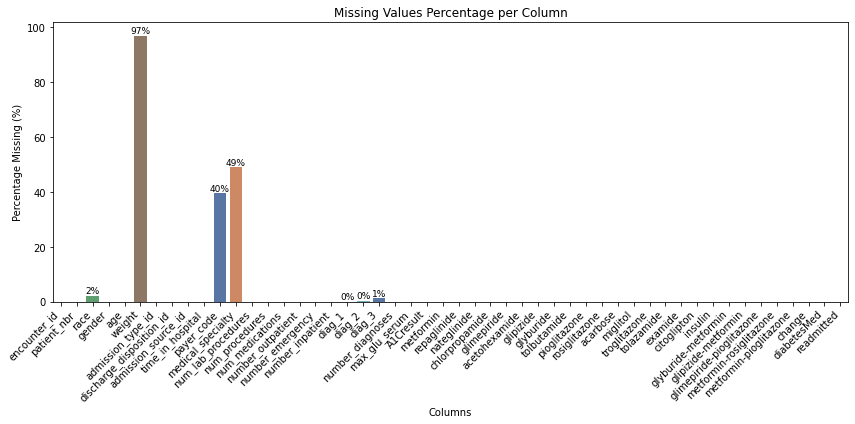

In [10]:
# checkin percentage of missing attribute per column
# Assuming 'df' is your DataFrame
missing_data = dt.isnull().mean() * 100  # Calculate the percentage of missing values per column

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=missing_data.index, y=missing_data.values, palette='deep')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing (%)')
plt.title('Missing Values Percentage per Column')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Annotate the bars with percentage values (if greater than 0)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.0f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',fontsize=9)
plt.show()

In [11]:
# payers code, medical specialty, race, diagnosis 1, diagnosis 2 and diagnosis 3
# Remove ID variables, Weight
dt=dt.drop(["patient_nbr","encounter_id","weight"],axis=1)

In [12]:
# Combining our targe to Yes and No instead of [No, >30, <30]
dup_data = dt.copy(deep=True)

# Update "readmitted" column
dup_data.loc[dup_data["readmitted"] == ">30", "readmitted"] = "YES"
dup_data.loc[dup_data["readmitted"] == "<30", "readmitted"] = "YES"

# Check unique values in "readmitted" column
print(dup_data["readmitted"].unique())

['NO' 'YES']


In [13]:
age_id = {'[0-10)':5, 
          '[10-20)':15, 
          '[20-30)':25, 
          '[30-40)':35, 
          '[40-50)':45, 
          '[50-60)':55,
          '[60-70)':65, 
          '[70-80)':75, 
          '[80-90)':85, 
          '[90-100)':95}
dt['age'] = dt.age.replace(age_id)

## Looking to see correlation plot 

+ Checking correlation plot to see if we can use a variable that is correlated with our target variable to check those with the missing columns

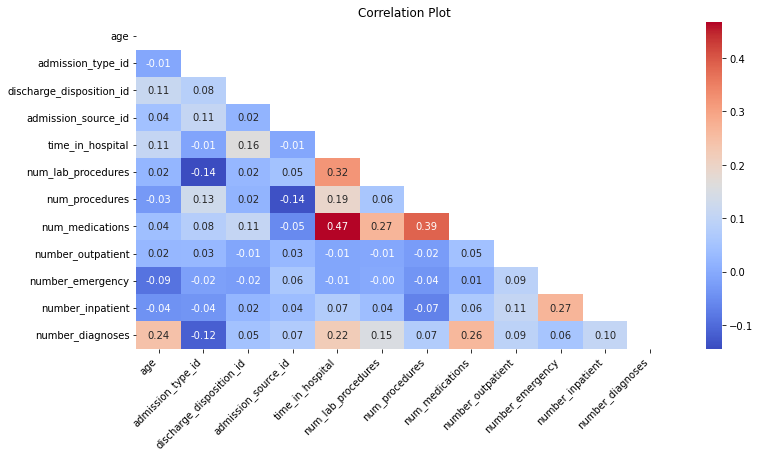

In [14]:
corr_matrix = dt.corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(12, 6))  

# Create the correlation plot
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)

plt.xticks(rotation=45, ha='right')
plt.title('Correlation Plot')
plt.show()

**Relationships found per Corr plot**
+ Num of Medication and time in hospital
+ Lab procedures and time in hospital
+ Num procedures and num of medication
+ Num of diagnoses and num of medications
+ Num of diagnoses with time in hospital
+ Admission type  and num of procedures


# Using Semi-Supervise Algorithm to fill missing variables since relationships were found for the variables but there was not a third column that controlled it. They were missing completely at random

## >> Running a semi -supervised algorithm to imput medical_specialty since its missing completely at random

In [15]:
inputed_df=pd.read_csv("SemiSupervised.csv")

# Fixing diag_1, diag_2 and diag_3

+ Get the max of the three set as 1 and rest 0 so <-- not a good idea removed

-- try these instead --
+ Count the amout of dignosis [250,na,5]->[1,0,1]
+ replacing nan to 0
 currently 2 df => flags, semi_supervised learning


In [16]:
dt.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [17]:
#Couting the total diagnoses
columns_to_count = ['diag_1', 'diag_2', 'diag_3']

# Count non-null values for each row in the specified columns
dt["total_diagnoses"]=dt[columns_to_count].count(axis=1)
inputed_df["total_diagnoses"]=dt["total_diagnoses"]

In [18]:
#Replacing with flag
dt.replace(np.nan, "miss", inplace=True)

In [19]:
# Diag columns no longer have missing variables
# --> No missing variables!!!!!
inputed_df.isnull().sum().to_frame(name='counts').query('counts > 0')

,counts
diag_1,21
diag_2,358
diag_3,1423


# Earlier attempts at imputting [race, and payer_code]missing variables by finding patterns after looking throught the raw data

## >> Inputing Race
***Race Patterns***
+ Across all numeric variables caucasians have the lowest variance followed by African Americans then by hispanics,  others and Asians

Diagnoses
+ Caucasians have the ***highest mean*** of diagnoses of 7.53  with very low variability
+ Hispanics have the ***lowest mean*** 6.9 with a range going as low as 6.8 and high as 7
+ African Americans stick to 7.1 mean with low variability
+ Asians have the highest variability from 6.9 to 7.2 at a mean with 7
+ Other have almost a mean of 7.3 with some variabiity
Impatient 
+ Cacasians again have the lowest variability but sit at .64m mean second highest inpatient
+ The highest is African americans with .7

+ Number_impation  is 1 median for ***minorities*** on the group <30, African American, Asian and hispanic
+ Hispanics have 0 number of procedures for >30 and NO. Asisn <30 have a median procedure of 0
+ Race vs the rest of the continuous variables seems to not be all around the same median range
+ The group that gets readmitted the lowest is Asians 35% while Caucasians are the highest readmission with 46% followed by Affrican Americans with 45%
+ Time in hospital, num_lab_procedure, num_medications seem to be the only ones correlated with the different races
+ Disposition_id and readmission [<30,>30,NO] seem to have a relationship


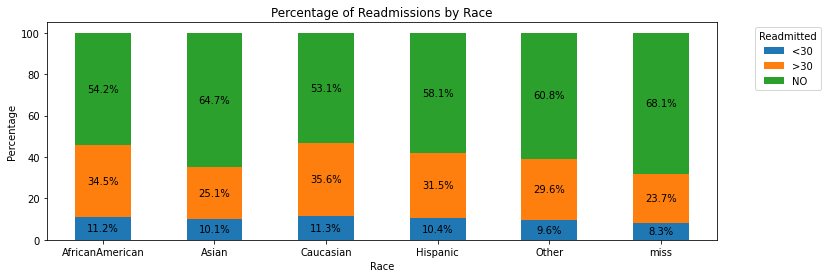

In [20]:
counts = dt.groupby(['race', 'readmitted']).size().unstack(fill_value=0)

# Calculate the percentages
percentages = counts.div(counts.sum(axis=1), axis=0) * 100
ax = percentages.plot(kind='bar', figsize=(12, 4), stacked=True)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')
    

plt.xlabel('Race')
plt.ylabel('Percentage')
plt.title('Percentage of Readmissions by Race')

plt.legend(title='Readmitted', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

# Show the plot
plt.show()

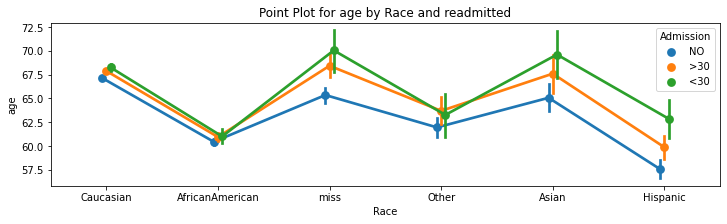

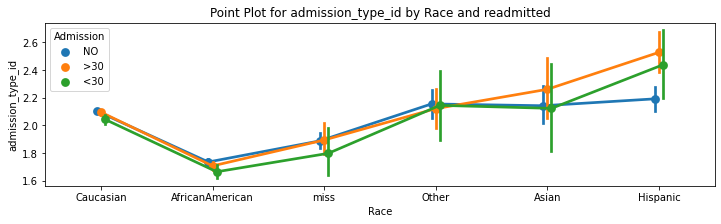

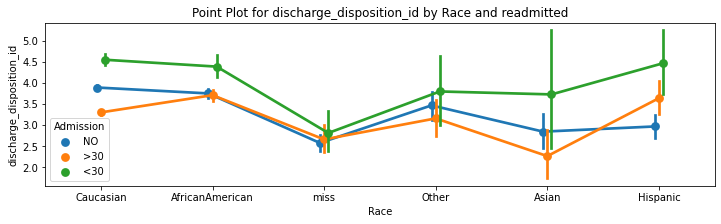

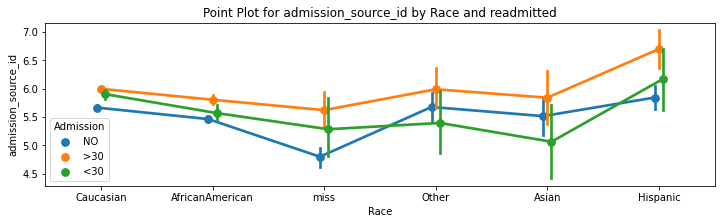

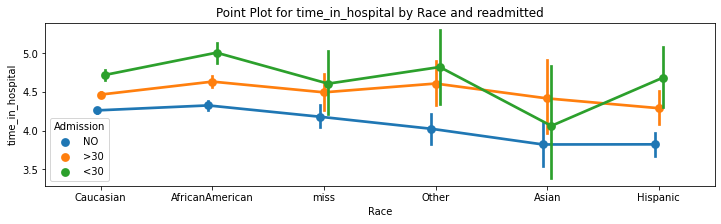

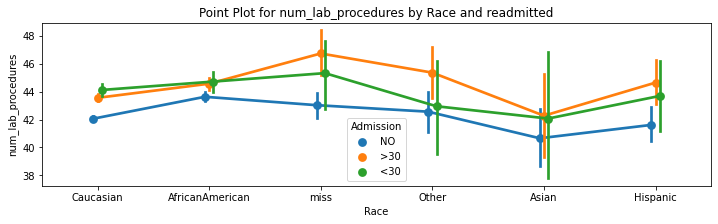

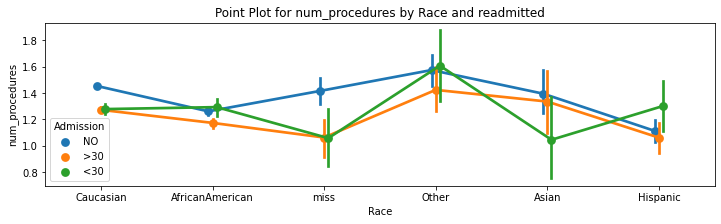

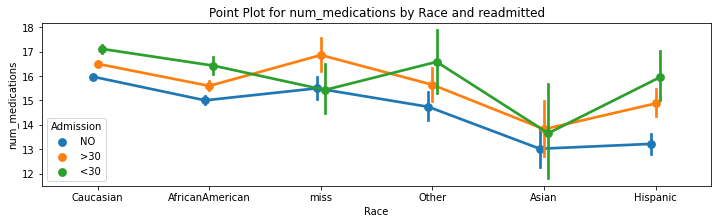

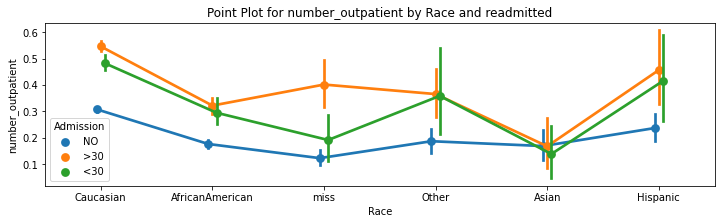

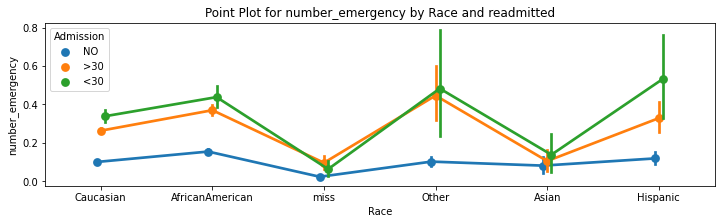

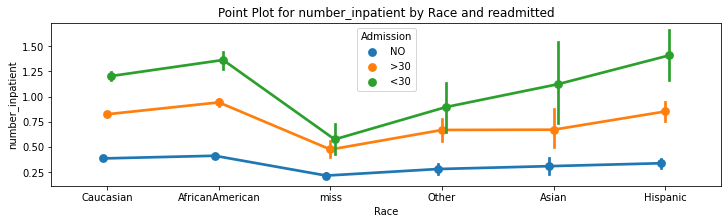

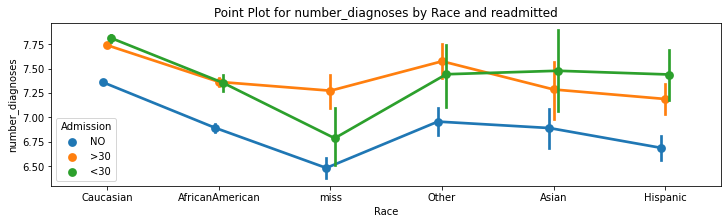

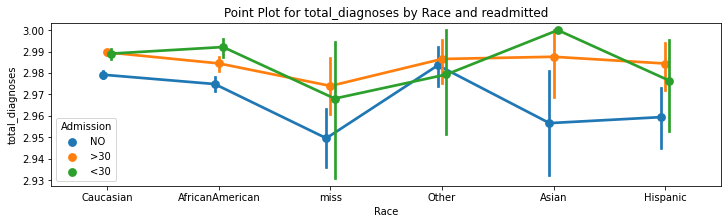

In [21]:
cont_df=dt.select_dtypes(exclude=['object'])
# Continues variable by race and readmission 
for i in cont_df.columns:
    plt.figure(figsize=(12, 3))  
    sns.pointplot(x='race', y=i, data=dt, hue='readmitted', dodge=True)  
    plt.title(f'Point Plot for {i} by Race and readmitted')  
    plt.xlabel('Race')  
    plt.ylabel(i)  
    plt.legend(title='Admission')  
    plt.show()  
    
    

+ Race has a relation with Time in hospital, num_lab_procedure, num_medications but chose mode Num_medication to impute missing variables since that has the highest variability

In [22]:
from scipy.stats import chi2_contingency
import scipy
dt.loc[dt["readmitted"] == ">30", "readmitted"] = "YES"
dt.loc[dt["readmitted"] == "<30", "readmitted"] = "YES"

cross_tab=pd.crosstab(dt['race'], dt['readmitted'])
chi2, p, dof, expected = chi2_contingency(cross_tab)

print(p)

3.693156699994485e-58


In [23]:
from scipy.stats import chi2_contingency
import scipy
chisqt = pd.crosstab(dt.race, dt.num_medications, margins=True)

value = np.array([chisqt.iloc[0][0:75].values,
                  chisqt.iloc[1][0:75].values,
                  chisqt.iloc[2][0:75].values,
                  chisqt.iloc[3][0:75].values,
                  chisqt.iloc[4][0:75].values
                 ])

chi2_stat, p_val, dof, expected = chi2_contingency(value)

print("Chi-squared statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)


Chi-squared statistic: 804.8289627241991
P-value: 1.2015416392116891e-48
Degrees of freedom: 296


In [24]:
race_by_numimp = dt.groupby(['readmitted', 'num_medications'])['race'].apply(lambda x: x.mode().iloc[0])

# Replace NA in "race" using race_by_numimp
for i in range(len(dt)):
    if pd.isna(dt.at[i, 'race']):
        readmitted_value = dt.at[i, 'readmitted'] 
        num_medications_value = dt.at[i, 'num_medications']
        if (readmitted_value, num_medications_value) in race_by_numimp.index:
            imputed_race = race_by_numimp.loc[(readmitted_value, num_medications_value)]
            dt.at[i, 'race'] = imputed_race

In [25]:
dt["race"].isna().mean()
# Medical_specialty is no longer has missing variables
dt.isnull().sum().to_frame(name='counts').query('counts > 0')

,counts


+ There is enough evidence to reject the null hypothesis of all races having equal number of medication (p_val=9.375516725969002e-48). We observed this relationship as well in the plots which why we are using this variable to impute missing valus in Race

## >> payer_code imputation


In [26]:
dt['payer_code'].unique()

array(['miss', 'MC', 'MD', 'HM', 'UN', 'BC', 'SP', 'CP', 'SI', 'DM', 'CM',
       'CH', 'PO', 'WC', 'OT', 'OG', 'MP', 'FR'], dtype=object)

In [27]:
dt.groupby('payer_code')['race'].value_counts(normalize=True).mul(100).round(1)

payer_code  race           
BC          Caucasian          75.2
            AfricanAmerican    19.0
            miss                2.4
            Hispanic            1.8
            Other               1.0
                               ... 
miss        AfricanAmerican    23.0
            Hispanic            2.5
            Other               1.7
            miss                1.4
            Asian               0.7
Name: race, Length: 93, dtype: float64

+ The users of OT have over 50% African americans

+ Looked at the raw data in excel and didn't find any pattens but though Age, Race and Insulin would have an influence as well as age vs Payer_code.
+ Therefore we plotted to see if there was any realationship between Payer code, age and race as well as age vs Payer_code but no emminent relationship found to help impute data.  

+ the median of age for all the races in the data with the missing payer_code is 65 year old.

***ultimatly no pattern was found thus will will replace missing variables for payer code with unique flag***

In [28]:
dt[dt["payer_code"].isna()].groupby("race").median()

,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,total_diagnoses
race,,,,,,,,,,,,,


FR is an outlier so we can't use it to impute Payer_code
+ times in hospital =10 then Payer code is FR
+ num_lab_procedures >60  then Payer code is FR
+ num_medications  ==39 then Payer FR

+ A lot of African american look at their insuling have 34% as steady while the other races are 24-29%

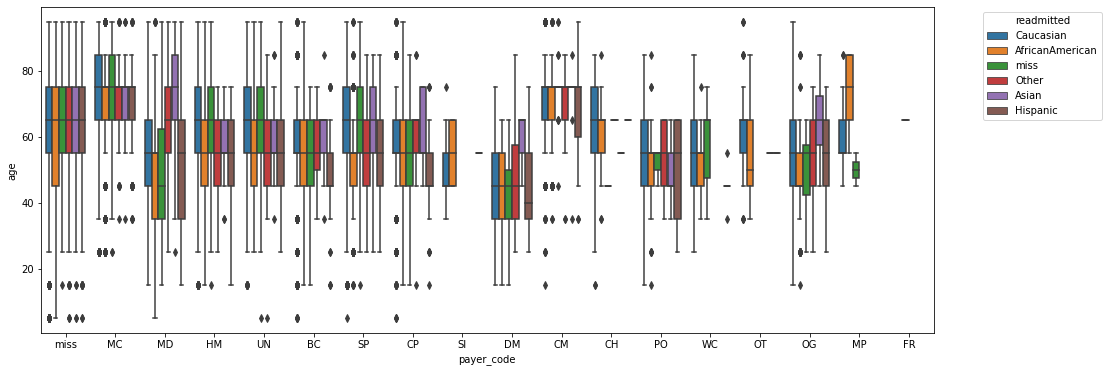

In [29]:
# sns.barplot(x="race", data= dt, hue="race")
# Create a strip plot
plt.figure(figsize=(16, 6))

sns.boxplot(x="payer_code", y="age", hue='race', data=dt)
plt.legend(title='readmitted', bbox_to_anchor=(1.05, 1), loc='upper left')



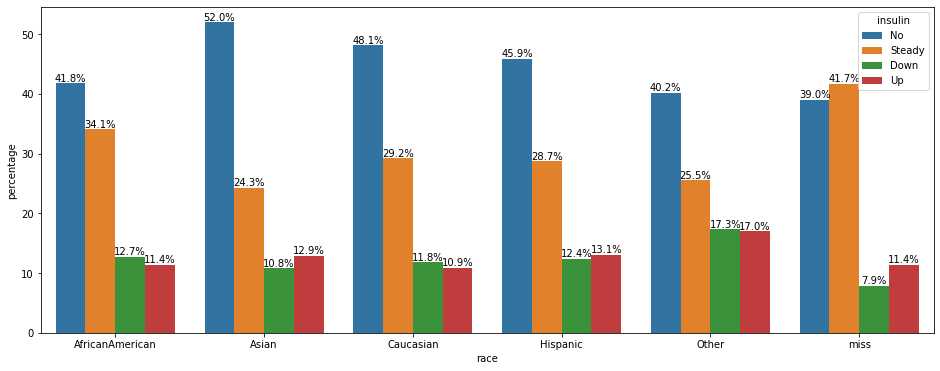

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))

x, y, hue = "race", "percentage", "insulin"

# Create the bar plot
ax = sns.barplot(data=dt[hue]
        .groupby(dt[x])
        .value_counts(normalize=True)
        .mul(100)
        .round(1)
        .rename(y)
        .reset_index(), x=x, y=y, hue=hue)

# Add numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


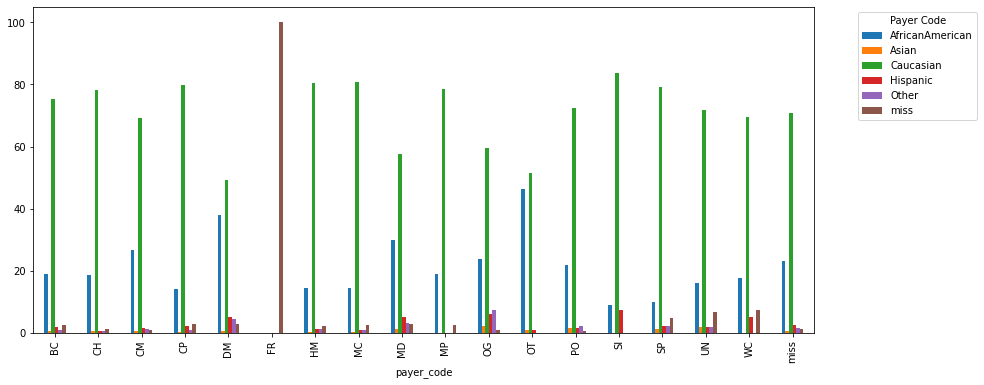

In [31]:
l=pd.crosstab( dt['payer_code'],dt['race'],normalize='index')*100
l.plot(kind='bar', figsize=(14, 6)).legend(title='Payer Code', bbox_to_anchor=(1.05, 1), loc='upper left')


In [32]:
dt['payer_code'].fillna('extra', inplace=True)

In [33]:
dt["race"].isna().mean()
# Medical_specialty is no longer has missing variables
dt.isnull().sum().to_frame(name='counts').query('counts > 0')

,counts


## >> Attempts at looking into medical_specialty to input values but we ended keeping the inputed values of the semi-supervised for this after looking at plots and running a random forest algor moved at the very end of the notebook since it only reached 50%  accuracy and 10% F1 score

In [34]:
readmit = pd.crosstab(dt['medical_specialty'], dt['readmitted'])

# Calculate the percentage based on the sum of counts within each race group
readmit_percentage = readmit.div(readmit.sum(1), axis=0) * 100

readmit_percentage.sort_values(by='NO', ascending=False).head(5)

readmitted,NO,YES
medical_specialty,,
Psychiatry-Addictive,100.0,0.0
Proctology,100.0,0.0
Perinatology,100.0,0.0
Speech,100.0,0.0
Neurophysiology,100.0,0.0


In [35]:
# Lets create a crosstab and find those that have a median of 15
p=pd.crosstab(dt['medical_specialty'], dt['readmitted'], values=dt["num_medications"], aggfunc='median')
# Filter those columns were at least one category equal to 15
p[(p == 15).any(axis=1)]


readmitted,NO,YES
medical_specialty,,
Cardiology,15.0,16.0
Hematology/Oncology,14.0,15.0
Oncology,15.0,15.0
Otolaryngology,15.0,18.0
Pediatrics-Pulmonology,14.0,15.0
Podiatry,15.0,17.0
Pulmonology,13.0,15.0
Surgeon,15.0,16.0
Surgery-General,15.0,16.0


+ An option for the missing variables in medical_specialty would be
    - Yes "<30"=Could be(Family/GeneralPractice or InternalMedicine Surgeon)
    - Yes ">30"= Cardiology, Hospitalist, Pediatris-Pulmonology, Pulmonology or Surgery-PlasticWithinHeadandNeck
    - NO= Cardiology, Oncology, Otolaryngology, Podiatry, Surgeon or Surgery_general
+ However, we are aware there may not be a relationship 100% however better than guessing

In [36]:
p=pd.crosstab(dt['medical_specialty'], dt['readmitted'], values=dt["number_diagnoses"], aggfunc='median')
# Too many options and no pattern was found
len(p[(p == 9).any(axis=1)])

# p.sort_values(by='NO', ascending=False).head(10)

24

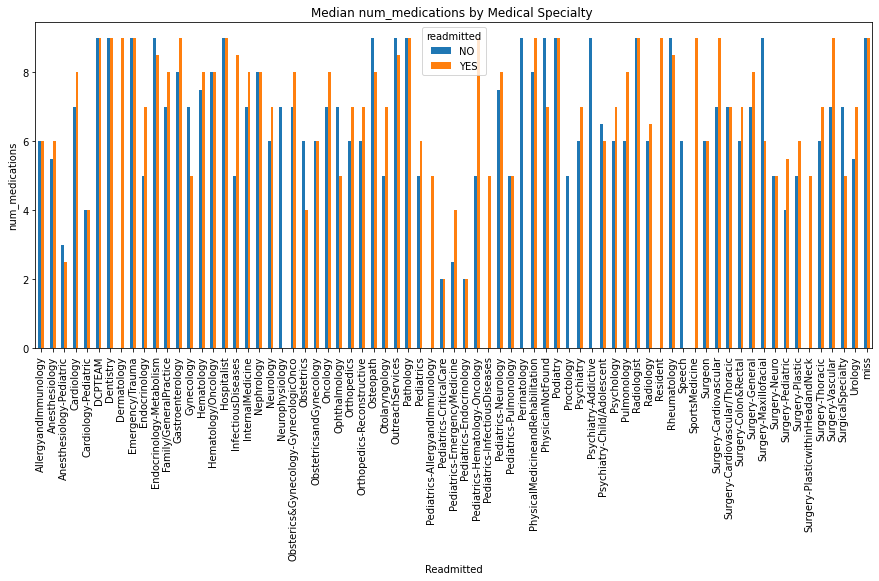

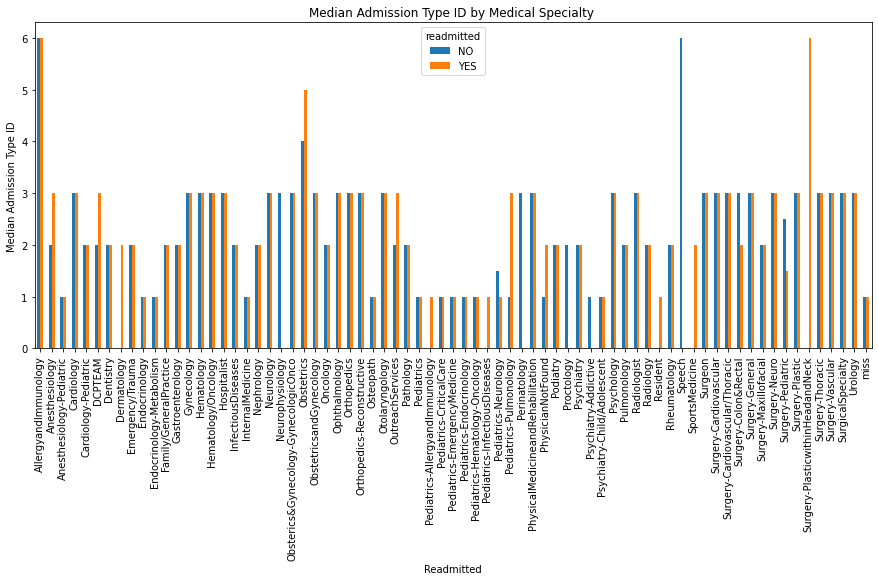

In [37]:
# Plot the transposed DataFrame
p.plot(kind='bar', figsize=(15, 6))  # You can adjust the figure size as needed

# Add labels and title
plt.xlabel('Readmitted')
plt.ylabel('num_medications')
plt.title('Median num_medications by Medical Specialty ')

plt.show()

l=pd.crosstab(dt['medical_specialty'], dt['readmitted'], values=dt["admission_type_id"], aggfunc='median')

# Plot the transposed DataFrame
l.plot(kind='bar', figsize=(15, 6))  # You can adjust the figure size as needed

# Add labels and title
plt.xlabel('Readmitted')
plt.ylabel('Median Admission Type ID')
plt.title('Median Admission Type ID by Medical Specialty ')

plt.show()

In [38]:
# replace to flag
dt['medical_specialty'].fillna('missed', inplace=True)

# Chi Square

In [39]:
cross_tab = pd.crosstab(dt['race'], dt['readmitted'])
chi2, p, dof, expected = chi2_contingency(cross_tab)
print("The P-value for Race and readmitted chi square test ", p)

The P-value for Race and readmitted chi square test  3.693156699994485e-58


In [40]:
cross_tab = pd.crosstab(inputed_df['race'], inputed_df['readmitted'])
chi2, p, dof, expected = chi2_contingency(cross_tab)
print("Using the data imputted by Semi Supervised")
print("The P-value for Race and readmitted chi square test ", p)

Using the data imputted by Semi Supervised
The P-value for Race and readmitted chi square test  1.6997321730483784e-14


In [41]:
cross_tab = pd.crosstab(dt['age'], dt['readmitted'])
chi2, p, dof, expected = chi2_contingency(cross_tab)
print("The P-value for Age and readmitted chi square test ", p)

The P-value for Age and readmitted chi square test  5.1046708632083964e-48


In [42]:
cross_tab = pd.crosstab(inputed_df['age'], inputed_df['readmitted'])
chi2, p, dof, expected = chi2_contingency(cross_tab)
print("Using the data imputted by Semi Supervised")
print("The P-value for Race and readmitted chi square test ", p)

Using the data imputted by Semi Supervised
The P-value for Race and readmitted chi square test  9.348415309480624e-56


In [43]:
cross_tab = pd.crosstab(dt['gender'], dt['readmitted'])
chi2, p, dof, expected = chi2_contingency(cross_tab)
print("The P-value for Race and readmitted chi square test ", p)

The P-value for Race and readmitted chi square test  1.899934547488499e-08


In [44]:
cross_tab = pd.crosstab(inputed_df['gender'], inputed_df['readmitted'])
chi2, p, dof, expected = chi2_contingency(cross_tab)
print("Using the data imputted by Semi Supervised")
print("The P-value for Race and readmitted chi square test ", p)

Using the data imputted by Semi Supervised
The P-value for Race and readmitted chi square test  1.447272318868805e-07


# EDA
## Looking at the categorical variables

In [45]:
dt.select_dtypes(include=['object']).columns

Index(['race', 'gender', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2',
       'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')

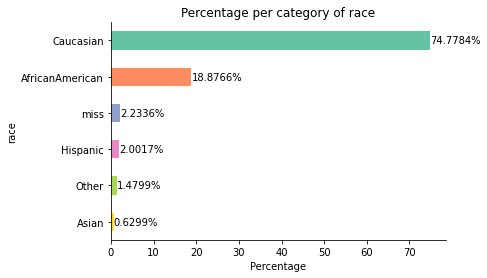

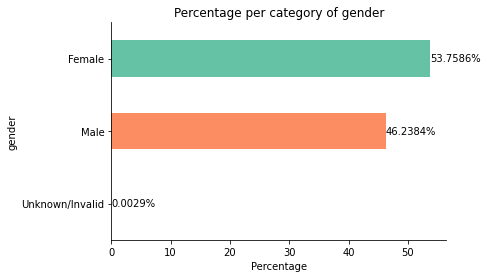

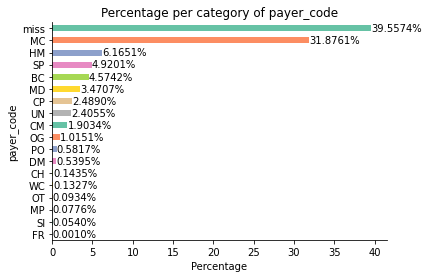

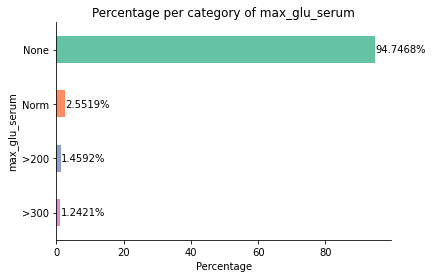

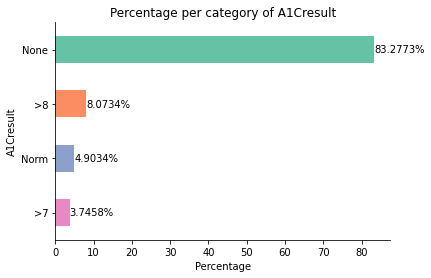

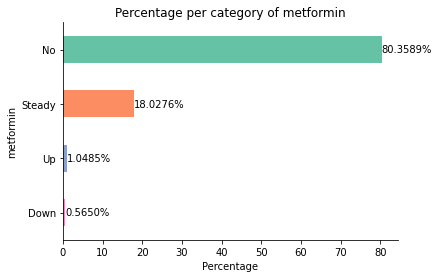

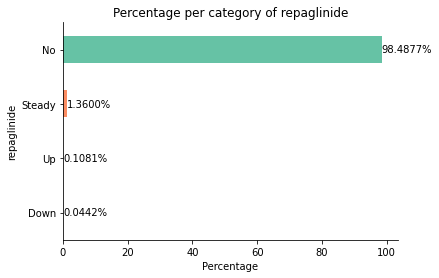

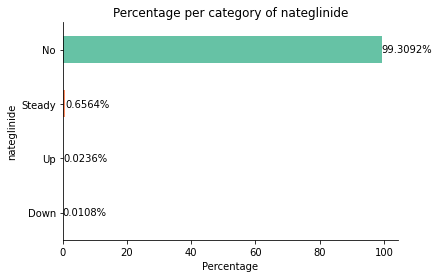

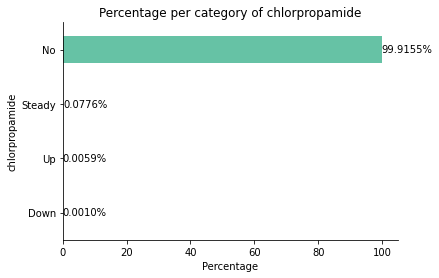

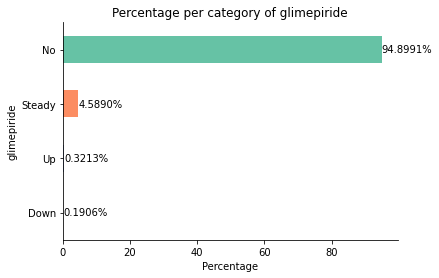

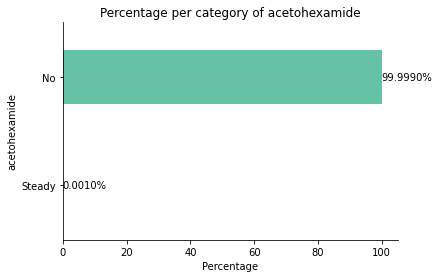

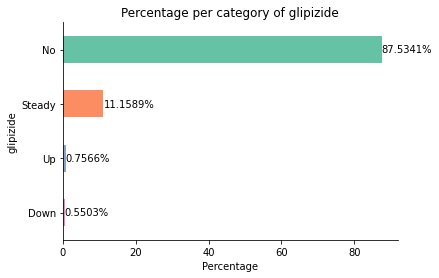

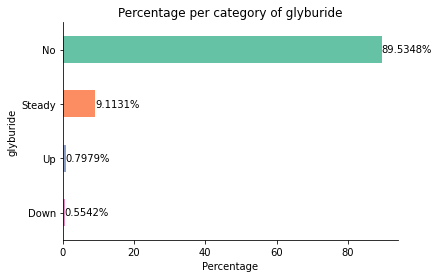

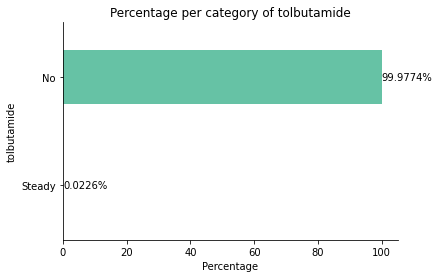

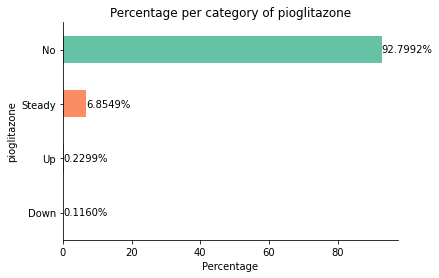

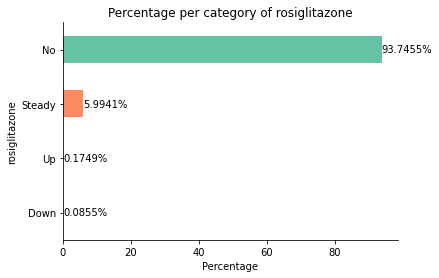

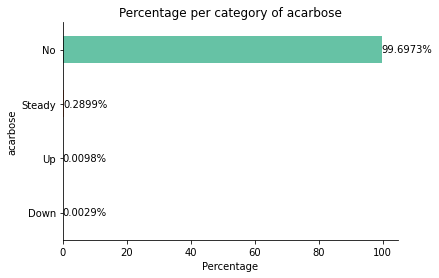

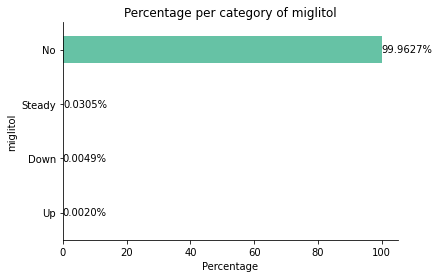

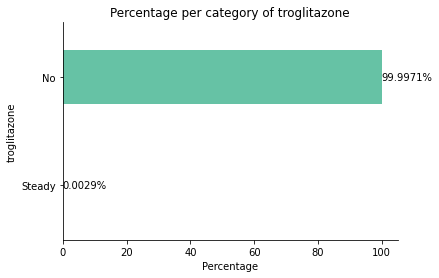

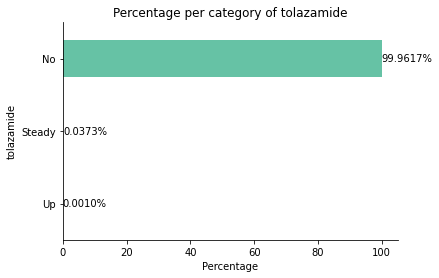

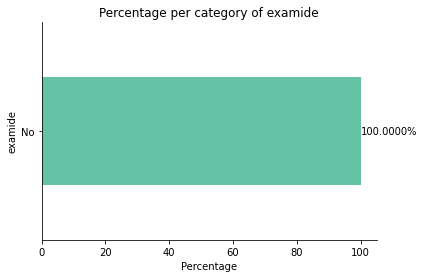

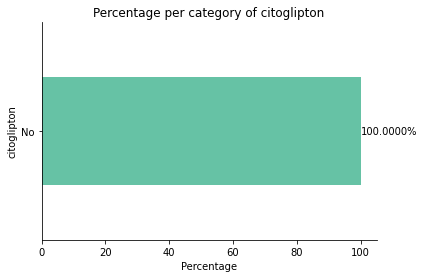

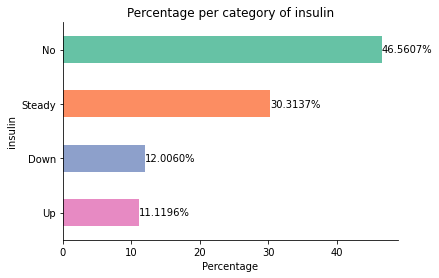

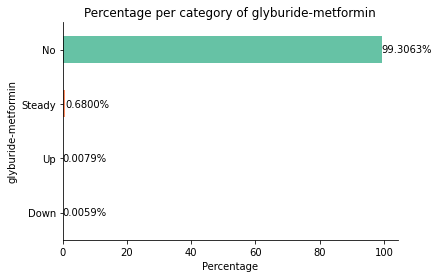

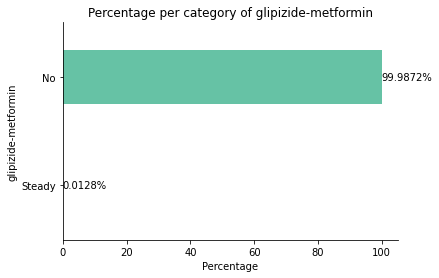

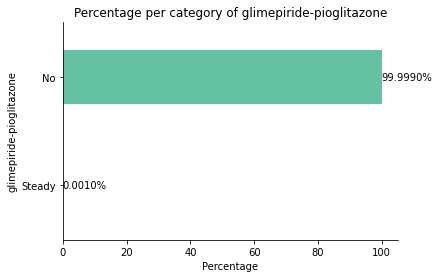

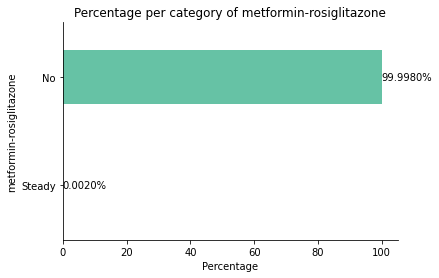

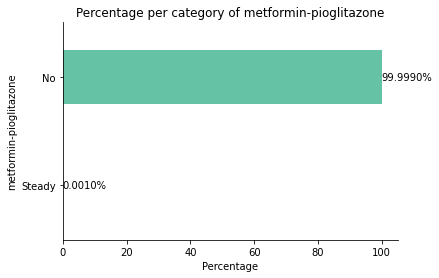

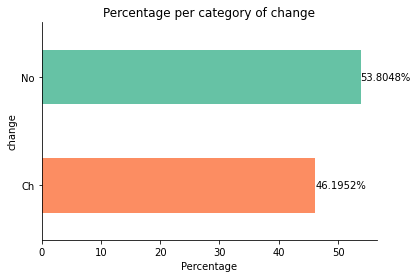

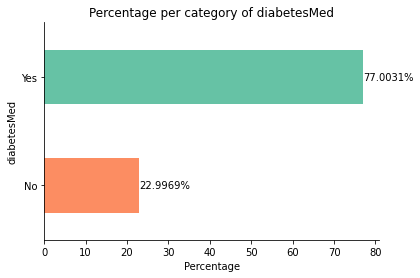

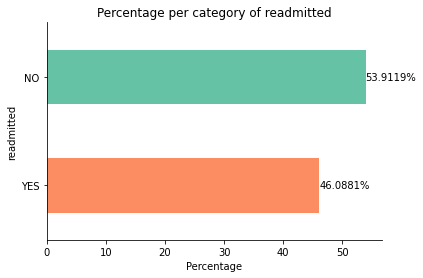

In [47]:
#Assuming 'data' is your DataFrame
cat_df = dt.select_dtypes(include=['object']).drop(["medical_specialty",'diag_1','diag_2','diag_3'], axis=1)

# Get the number of unique categories for each column
num_categories = cat_df.nunique()

# Define a color palette with as many colors as there are unique categories
color_palette = sns.color_palette("Set2", n_colors=num_categories.max())

for i in cat_df.columns:
    value_counts = dt[i].value_counts(normalize=True)
    colors = color_palette[:len(value_counts)]
    
    ax = value_counts.mul(100).plot(kind="barh", color=colors)
    
    plt.xlabel("Percentage")
    plt.ylabel(i)
    plt.title(f"Percentage per category of {i}")
    plt.gca().invert_yaxis()
    
    for index, value in enumerate(value_counts.mul(100)):
        ax.text(value, index, f'{value:.4f}%', ha='left', va='center', color='black')
    sns.despine()
    plt.show()
    
# Diabetes, change, metformin-piogitazone but flit no=yes could be turned into numeric


+ 76% is Caucasian
+ Age bucket is larger and ther is a correlation the older get hospitilized more 
+ Drop citoglipton and examide since the only value is "No"

In [48]:
# # Droping examide and citoglipton which only had 1 as the value
dt=dt.drop(dt[['examide','citoglipton']], axis=1)
inputed_df=inputed_df.drop(inputed_df[['examide','citoglipton']], axis=1)

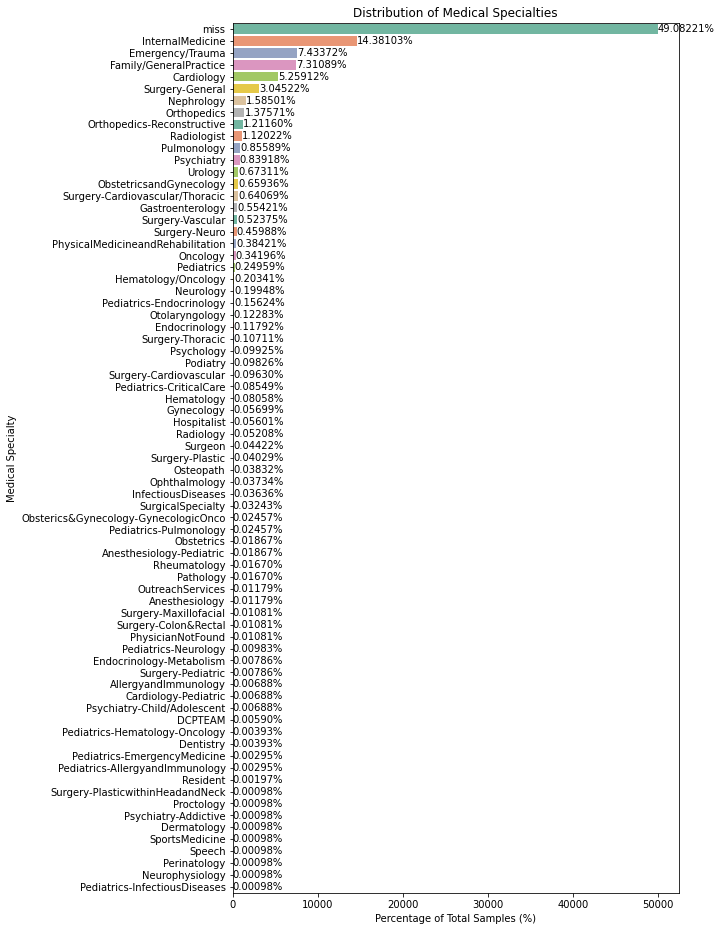

In [49]:
# Create a countplot of medical specialty percentages since it coudln't be printed above due to size
plt.figure(figsize=(8, 16))
sns.countplot(
    y=dt['medical_specialty'],
    orient='h',
    palette='Set2',
    order=dt['medical_specialty'].value_counts().index,  # Sort by count
)
plt.xlabel('Percentage of Total Samples (%)')
plt.ylabel('Medical Specialty')
plt.title('Distribution of Medical Specialties')

# Annotate the bars with percentage values
for p in plt.gca().patches:
    width = p.get_width()
    percentage = (width / len(dt)) * 100
    plt.gca().annotate(f'{percentage:.5f}%', (width + 1, p.get_y() + p.get_height() / 2), ha='left', va='center')

plt.show()


1: max diag ==1 rest 0 -->1,0,0
2: all ? to 0

## Looking a numeric variables
+ comments
+ admission_type_id -> Difference between 5 Not Available, 8 Not Mapped, 6 NULL
+ discharge_disposition_id -> 18 NULL, 25 Not Mapped, 26 Unknown/Invalid
+ admission_source_id-->9 NOT AVAILable, 15 NOT AVAILable ,17 NULL
+ Interesting num of medication is normaly distributed

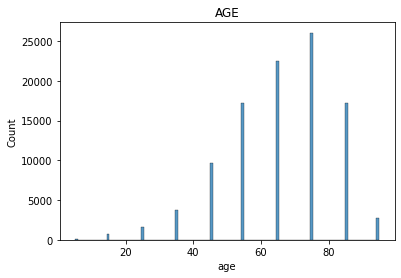

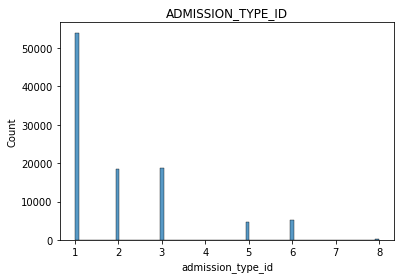

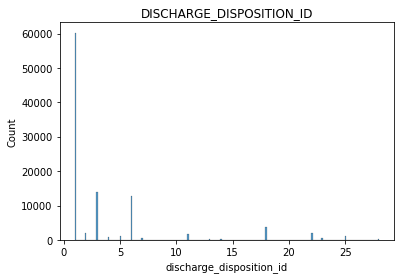

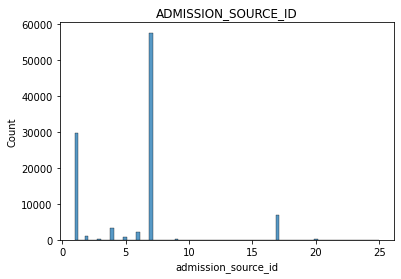

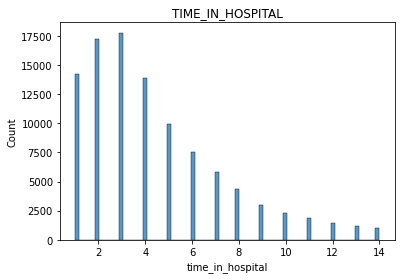

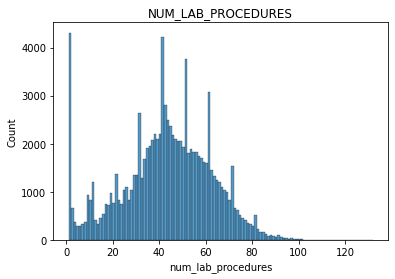

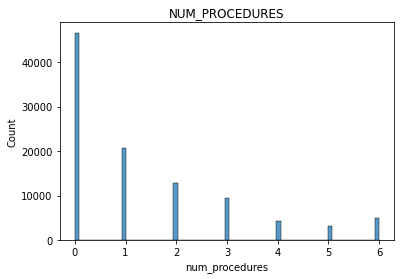

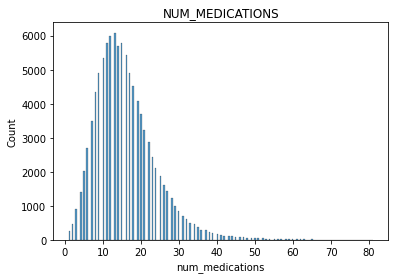

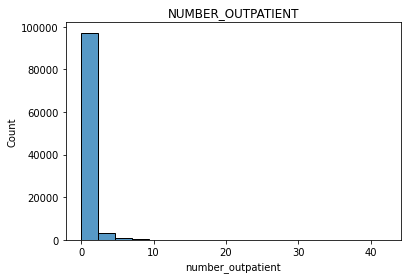

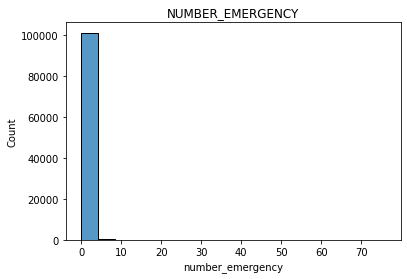

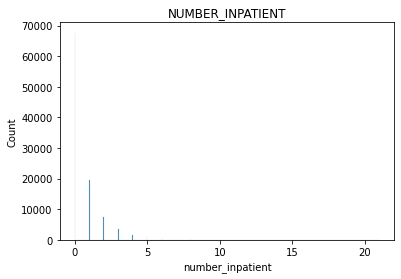

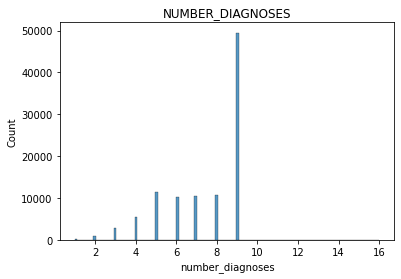

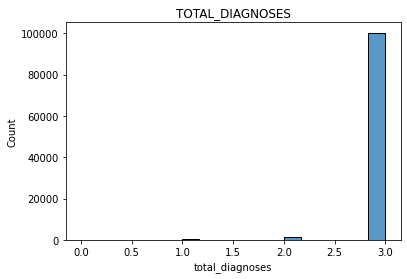

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in dt.select_dtypes(include=['int64']).columns:
    sns.histplot(dt[i],kde=False)
    plt.title(i.upper())
    plt.show()
    
#admission_type_id -> Difference between 5 Not Available, 8 Not Mapped, 6 NULL
#discharge_disposition_id -> 18 NULL, 25 Not Mapped, 26 Unknown/Invalid
#admission_source_id-->9 NOT AVAILable, 15 NOT AVAILable ,17 NULL
#num_procedures
#num_emergency

#interesting num of medication is normaly distributed

In [51]:
# variables are not normally distributed 
# Fixing variables for models as logistic regression requeres normal distribution

# Changing some variables as categories since they should be categories
num_to_cat=dt[['diag_1','diag_2','diag_3','admission_type_id','discharge_disposition_id','admission_source_id','number_emergency']]
for i in num_to_cat.columns:
    dt[i] = dt[i].astype('category')
    inputed_df[i] = inputed_df[i].astype('category')

# making age as continuous
dt['age'] = dt['age'].astype('int64')
inputed_df['age']= inputed_df['age'].astype('int64')

dt['time_in_hospital'] = dt['time_in_hospital'].replace(0, 0.0001)
dt['number_inpatient'] = dt['number_inpatient'].replace(0, 0.0001)
dt['number_outpatient'] = dt['number_outpatient'].replace(0, 0.0001)
dt['num_procedures'] = dt['num_procedures'].replace(0, 0.0001)

inputed_df['time_in_hospital'] = inputed_df['time_in_hospital'].replace(0, 0.0001)
inputed_df['number_inpatient'] = inputed_df['number_inpatient'].replace(0, 0.0001)
inputed_df['number_outpatient'] = inputed_df['number_outpatient'].replace(0, 0.0001)
inputed_df['num_procedures'] = inputed_df['num_procedures'].replace(0, 0.0001)

# Logging the 3 variables
for i in ['time_in_hospital','num_medications','age','number_inpatient','number_outpatient']:
    dt[i]=np.log(dt[i])
#     inputed_df[i]=np.log(inputed_df[i])

### changing from numeric to categoricalsince these are discrete:
+ 'diag_1','diag_2','diag_3','admission_type_id','discharge_disposition_id','admission_source_id','num_procedures','number_emergency'

### log 
- time_in_hospital
- num_medication
- age
*** distribution gets better but not normalized distribution***
- number_outpatient
- number_inpatient

### leave as is
- Num_lab_procedure


In [61]:
# Removing new variable but saving it in saved_totalDiag
saved_totalDiag=dt['total_diagnoses']
dt=dt.drop('total_diagnoses',axis=1)
inputed_df=inputed_df.drop('total_diagnoses',axis=1)

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit and transform only the numeric columns
numeric_columns = dt.select_dtypes(include=['number'])
dt[numeric_columns.columns] = scaler.fit_transform(numeric_columns)

# df_standardized = pd.DataFrame(scaler.fit_transform(dt), columns=dt.columns)

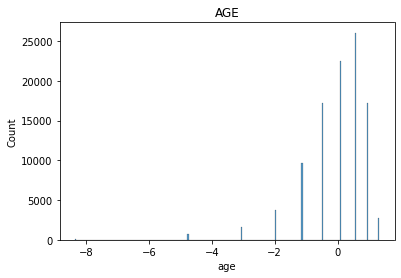

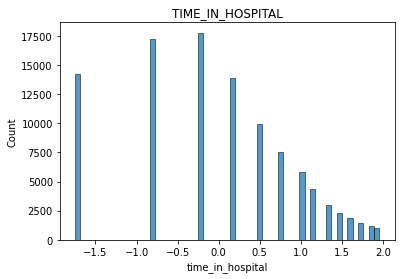

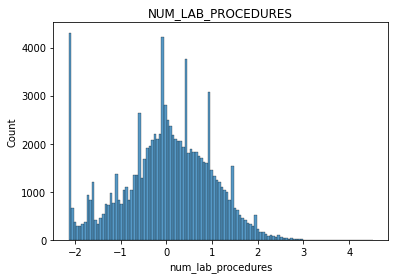

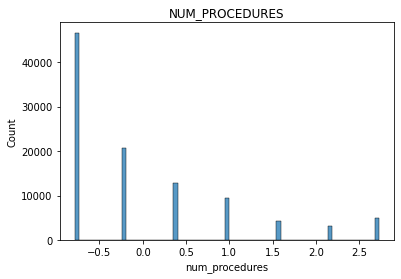

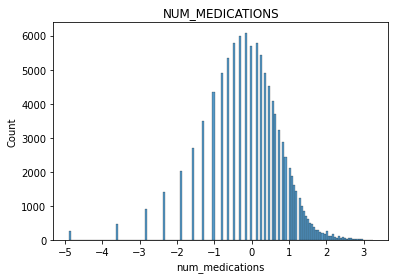

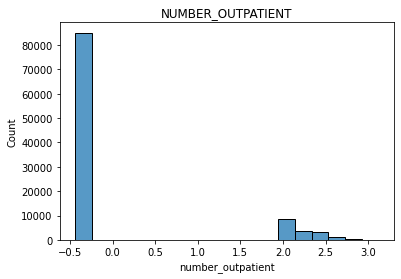

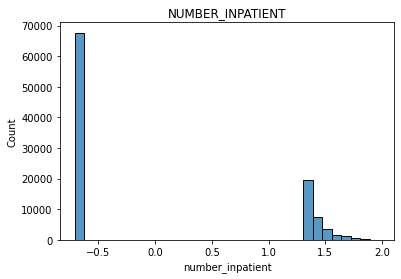

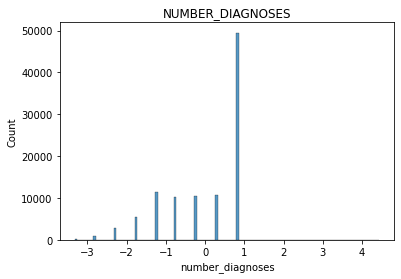

In [63]:
# Distribution after logged
for i in dt.select_dtypes(include=['float','int64']).columns:
    sns.histplot(dt[i],kde=False)
    plt.title(i.upper())
    plt.show()

In [65]:
# Categorical and Continuous data
print("There are ", len(dt.select_dtypes(include=['object','category']).columns), "object variables")
print("There are ", len(dt.select_dtypes(include=['float']).columns), "continuous columns")

There are  37 object variables
There are  8 continuous columns


***EDA completed***

# Run Model 

+ One hot encoding categorical variables

In [68]:
dt.columns 

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [69]:
# creating a list with all categorical 
categorical_columns=list(dt.select_dtypes(include=['object','category']).columns)
remove_col=['readmitted']
for i in remove_col:
    categorical_columns.remove(i)

# One-hot encode categorical columns

# With the inputed values from the semi supervise alg
model_dt_semiAlg = pd.get_dummies(inputed_df, columns=categorical_columns)

# With the imputed manual updates
# --> Medical_specialty with semi supervise, race using num_medication as reference and payer code with using a flag variable
model_dt_ManualUpdate=pd.get_dummies(dt, columns=categorical_columns)


In [70]:
# --> Change Readmitted to YES and NO 
model_dt_ManualUpdate.loc[model_dt_ManualUpdate["readmitted"] == ">30", "readmitted"] = "YES"
model_dt_ManualUpdate.loc[model_dt_ManualUpdate["readmitted"] == "<30", "readmitted"] = "YES"

model_dt_semiAlg.loc[model_dt_semiAlg["readmitted"] == ">30", "readmitted"] = "YES"
model_dt_semiAlg.loc[model_dt_semiAlg["readmitted"] == "<30", "readmitted"] = "YES"

### Running logistic regression  with manually imputted data

In [73]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into features and target
X = model_dt_ManualUpdate.drop("readmitted",axis=1)
y = model_dt_ManualUpdate['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

lr_noPenalty_Manual = LogisticRegression()
lr_noPenalty_Manual.fit(X_train, y_train)

y_pred = lr_noPenalty_Manual.predict(X_test)

class_report = classification_report(y_test, y_pred)

print(f'Classification Report:\n{class_report}')


/Users/lauraahumada/opt/anaconda3/envs/smuenv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Classification Report:
              precision    recall  f1-score   support

          NO       0.65      0.72      0.69     10973
         YES       0.63      0.55      0.59      9381

    accuracy                           0.64     20354
   macro avg       0.64      0.64      0.64     20354
weighted avg       0.64      0.64      0.64     20354



### Running logistic regression  with SemiSupervised imputted data

In [74]:
# Split the data into features and target
X_semi = model_dt_semiAlg.drop("readmitted",axis=1)
y_semi = model_dt_semiAlg['readmitted']

X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_semi, y_semi, test_size=0.2, random_state=42, stratify=y)

lr_noPenalty_SM = LogisticRegression()
lr_noPenalty_SM.fit(X_train_sm, y_train_sm)

y_pred = lr_noPenalty_SM.predict(X_test_sm)

class_report = classification_report(y_test_sm, y_pred)

print(f'Classification Report:\n{class_report}')



/Users/lauraahumada/opt/anaconda3/envs/smuenv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Classification Report:
              precision    recall  f1-score   support

          NO       0.64      0.75      0.69     10973
         YES       0.64      0.51      0.56      9381

    accuracy                           0.64     20354
   macro avg       0.64      0.63      0.63     20354
weighted avg       0.64      0.64      0.63     20354



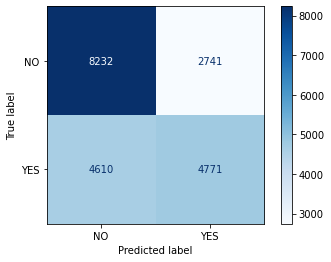

In [75]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred, cmap='Blues')

In [ ]:
len(X.columns)

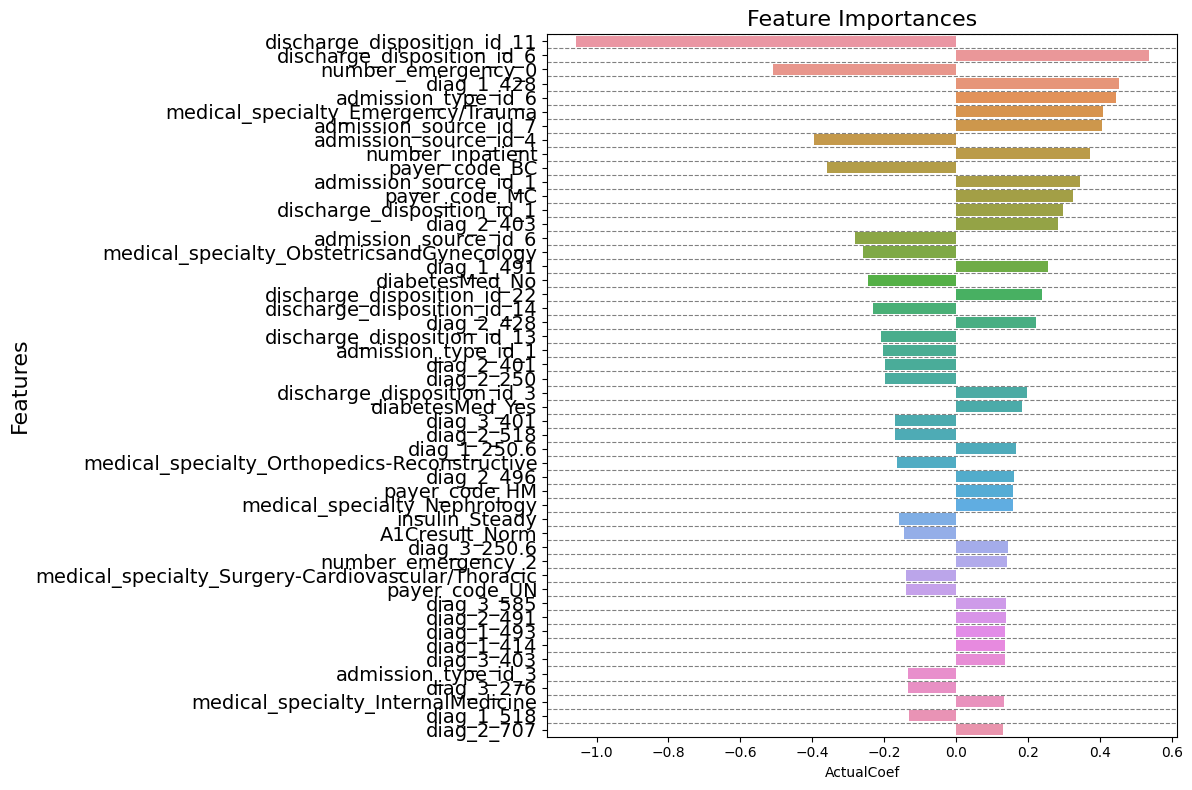

In [89]:
# Calculate feature importances (absolute values of coefficients)
importances = np.abs(lr_noPenalty_SM.coef_[0])
features = X_semi.columns

# Create a DataFrame to hold feature importances and sort it
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df["ActualCoef"]=lr_noPenalty_SM.coef_[0]
importance_df=importance_df.sort_values(by='Importance', ascending=False).head(50)
importance_df=importance_df.head(150)
# importance_df = importance_df.sort_values(by='Importance', ascending=False).index

plt.figure(figsize=(12, 8))  

# Set the style to have a white background
plt.style.use('default')  # Use the default style
sns.barplot(y=importance_df["Feature"], x=importance_df["ActualCoef"])

plt.title('Feature Importances', fontsize=16) 
plt.ylabel('Features', fontsize=16) 

tick_positions = range(len(importance_df["Feature"]))
tick_labels = importance_df["Feature"]
plt.yticks(tick_positions, tick_labels, fontsize=14) 

for pos in tick_positions:
    plt.axhline(y=pos - 0.5, color='gray', linestyle='--', linewidth=0.8)

plt.tight_layout()

plt.show()


### L1 SemiSupervised

In [78]:
l1_model = LogisticRegression(penalty='l1', solver='liblinear')
l1_model.fit(X_train_sm, y_train_sm)

y_pred = l1_model.predict(X_test_sm)

class_report = classification_report(y_test_sm, y_pred)

print(f'Classification Report for L1:\n{class_report}')


l2_model = LogisticRegression(penalty='l2', solver='liblinear')
l2_model.fit(X_train, y_train)

y_pred = l2_model.predict(X_test)

class_report = classification_report(y_test, y_pred)

print(f'Classification Report for L2:\n{class_report}')

Classification Report for L1:
              precision    recall  f1-score   support

          NO       0.65      0.73      0.69     10973
         YES       0.63      0.54      0.58      9381

    accuracy                           0.64     20354
   macro avg       0.64      0.64      0.63     20354
weighted avg       0.64      0.64      0.64     20354

Classification Report for L2:
              precision    recall  f1-score   support

          NO       0.65      0.72      0.68     10973
         YES       0.62      0.55      0.59      9381

    accuracy                           0.64     20354
   macro avg       0.64      0.63      0.63     20354
weighted avg       0.64      0.64      0.64     20354



### L2 Manually updated variables

In [83]:
l2_model = LogisticRegression(penalty='l1', solver='liblinear')
l2_model.fit(X_train, y_train)

y_pred = l2_model.predict(X_test)

class_report = classification_report(y_test, y_pred)

print(f'Classification Report for L1:\n{class_report}')

Classification Report for L1:
              precision    recall  f1-score   support

          NO       0.65      0.72      0.68     10973
         YES       0.63      0.55      0.59      9381

    accuracy                           0.64     20354
   macro avg       0.64      0.63      0.63     20354
weighted avg       0.64      0.64      0.64     20354



### L2 model with different C variables

+ at C=1.0 the best recall is obtained  at 10 it gives same recall for Yes but lower for No

In [ ]:
# Define a list of C values to test
# C_values = [0.1, 1.0, 10.0]  
C_values=np.logspace(-6,6,10)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_semi, y_semi, test_size=0.2, random_state=42, stratify=y)


for C in C_values:
    l2_model = LogisticRegression(penalty='l2', solver='liblinear', C=C)
    l2_model.fit(X_train_sm, y_train_sm)
    
    y_pred = l2_model.predict(X_test_sm)
    
    class_report = classification_report(y_test_sm, y_pred)
    
    print(f'Classification Report for C={C}:\n{class_report}')


+ L2 model with different C variables

In [82]:
# Define a list of C values to test
C_values = [0.01,0.1, 1.0,3.0]  

for C in C_values:
    l2_model = LogisticRegression(penalty='l1', solver='liblinear', C=C)
    l2_model.fit(X_train_sm, y_train_sm)
    
    y_pred = l2_model.predict(X_test_sm)
    
    class_report = classification_report(y_test_sm, y_pred)
    
    print(f'Classification Report for C={C}:\n{class_report}')
    print("-----------------------------------")
    


Classification Report for C=0.01:
              precision    recall  f1-score   support

          NO       0.63      0.79      0.70     10973
         YES       0.65      0.46      0.54      9381

    accuracy                           0.64     20354
   macro avg       0.64      0.63      0.62     20354
weighted avg       0.64      0.64      0.63     20354

-------------------------
Classification Report for C=0.1:
              precision    recall  f1-score   support

          NO       0.65      0.76      0.70     10973
         YES       0.65      0.52      0.58      9381

    accuracy                           0.65     20354
   macro avg       0.65      0.64      0.64     20354
weighted avg       0.65      0.65      0.64     20354

-------------------------
Classification Report for C=1.0:
              precision    recall  f1-score   support

          NO       0.65      0.73      0.69     10973
         YES       0.63      0.54      0.58      9381

    accuracy                  

In [81]:
# Define a list of C values to test
C_values = [0.01,0.1, 1.0,3.0]  

for C in C_values:
    l2_model = LogisticRegression(penalty='l1', solver='liblinear', C=C)
    l2_model.fit(X_train, y_train)
    
    y_pred = l2_model.predict(X_test)
    
    class_report = classification_report(y_test, y_pred)
    
    print(f'Classification Report for C={C}:\n{class_report}')
    print("-------------------------")
    


Classification Report for C=0.01:
              precision    recall  f1-score   support

          NO       0.64      0.76      0.69     10973
         YES       0.63      0.49      0.56      9381

    accuracy                           0.64     20354
   macro avg       0.63      0.62      0.62     20354
weighted avg       0.63      0.64      0.63     20354

-------------------------
Classification Report for C=0.1:
              precision    recall  f1-score   support

          NO       0.65      0.74      0.69     10973
         YES       0.64      0.54      0.58      9381

    accuracy                           0.65     20354
   macro avg       0.64      0.64      0.64     20354
weighted avg       0.64      0.65      0.64     20354

-------------------------
Classification Report for C=1.0:
              precision    recall  f1-score   support

          NO       0.65      0.72      0.68     10973
         YES       0.63      0.55      0.59      9381

    accuracy                  

In [ ]:
# Define a list of C values to test
C_values = [4.0,5.0, 6.0]  

for C in C_values:
    l2_model = LogisticRegression(penalty='l1', solver='liblinear', C=C)
    l2_model.fit(X_train, y_train)
    
    y_pred = l2_model.predict(X_test)
    
    class_report = classification_report(y_test, y_pred)
    
    print(f'Classification Report for C={C}:\n{class_report}')


### Cross validation L1 and L2 changing C

In [ ]:
# from sklearn.model_selection import cross_validate
# from sklearn.model_selection import StratifiedKFold, cross_validate

# C_values = [3.0,5.0]  

# scoring = ['precision_macro', 'recall_macro']
# sk_folds = StratifiedKFold(n_splits = 10)
# c_Scores_list=[]


# for C in C_values:
#     lrs_l2=LogisticRegression(penalty='l2', solver='liblinear', C=C)
#     lrs_l1=LogisticRegression(penalty='l1', solver='liblinear', C=C)
    
    
#     cvs2 = cross_validate(lrs_l2, X, y,  scoring=scoring, cv = sk_folds)
#     cvs1 = cross_validate(lrs_l1, X, y, scoring=scoring, cv = sk_folds)

#     c_Scores_list.append([C,np.mean(cvs1['test_recall_macro']),np.mean(cvs2['test_recall_macro'])])
#     print(C, " Completed")
    
# # Best Average recall CV Score L2:  0.6285113641779668  for C= 0.1
# # Best Average recall CV Score L1:  0.6284716266172024  for C= 0.1

# # -->> error because it was stopped at 1.0 as it was taking too much time
# # RESULTS OBTAINED
# # Average recall CV Score L1:  0.6207392615741109  for C= 0.01
# # Average precision CV Score L1:  0.6317275862519797  for C= 0.01
# # Average recall CV Score L2:  0.6271450448699474  for C= 0.01
# # Average precision CV Score L2:  0.6375759936573075  for C= 0.01
# # Average recall CV Score L1:  0.6284716266172024  for C= 0.1
# # Average precision CV Score L1:  0.637805223443547  for C= 0.1
# # Average recall CV Score L2:  0.6285113641779668  for C= 0.1
# # Average precision CV Score L2:  0.6365838523717404  for C= 0.1
# # Average recall CV Score L1:  0.6278999910250957  for C= 1.0
# # Average precision CV Score L1:  0.6351392050343468  for C= 1.0
# # Average recall CV Score L2:  0.6273127219851374  for C= 1.0
# # Average precision CV Score L2:  0.6341212525499211  for C= 1.0

## Grid Search

In [ ]:
# from sklearn.model_selection import GridSearchCV, KFold
# from sklearn.model_selection import StratifiedKFold, cross_validate

# l_r = LogisticRegression()
# params = {'C': [0.001, 0.01, 0.05, .08, 10], 'penalty':['l1'], 'solver':['liblinear']}

# splitter = StratifiedKFold(n_splits = 5)

# lasso_grid_search = GridSearchCV(estimator=l_r, param_grid=params, cv=splitter, n_jobs=-1, scoring='recall')

# # Fit the grid search to your data
# lasso_grid_search.fit(X, y)

# # Get the best recall score and best C value
# best__score = lasso_grid_search.best_score_
# best__C = lasso_grid_search.best_params_['C']
# best__penalty = lasso_grid_search.best_params_['penalty']
# best__model = lasso_grid_search.best_estimator_

# # Print the results
# print(f"Best Recall Score: {best__score:.4f}")
# print(f"Best C Value: {best__C}")
# print(f"Best Penalty: {best__penalty}")
# print(f"Best Lasso Model: {best__model}")


In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import StratifiedKFold, cross_validate

l_r = LogisticRegression()
params = {'C': [0.001, 0.01, 0.05, .08, 10], 'penalty':['l1'], 'solver':['liblinear']}

splitter = StratifiedKFold(n_splits = 5)

lasso_grid_search = GridSearchCV(estimator=l_r, param_grid=params, cv=splitter, n_jobs=-1, scoring='recall')

# Fit the grid search to your data
lasso_grid_search.fit(X, y)

# Get the best recall score and best C value
best__score = lasso_grid_search.best_score_
best__C = lasso_grid_search.best_params_['C']
best__penalty = lasso_grid_search.best_params_['penalty']
best__model = lasso_grid_search.best_estimator_

# Print the results
print(f"Best Recall Score: {best__score:.4f}")
print(f"Best C Value: {best__C}")
print(f"Best Penalty: {best__penalty}")
print(f"Best Lasso Model: {best__model}")


In [ ]:
# np.logspace(-6,6,10)

# Running the model with best C and Penalty

In [94]:
l2_C1= LogisticRegression(penalty='l2', solver='liblinear', C=0.01)
l2_C1.fit(X_train_sm, y_train_sm)

y_pred = l2_C1.predict(X_test_sm)

class_report = classification_report(y_test_sm, y_pred)

print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

          NO       0.64      0.77      0.70     10973
         YES       0.65      0.50      0.57      9381

    accuracy                           0.65     20354
   macro avg       0.65      0.64      0.63     20354
weighted avg       0.65      0.65      0.64     20354



In [105]:
# Create a DataFrame to hold feature importances and sort it
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df["ActualCoef"]=l2_C1.coef_[0]
importance_df.sort_values(by='Importance', ascending=False)[200:280]

,Feature,Importance,ActualCoef
2488,rosiglitazone_Steady,0.077884,0.077884
81,payer_code_SP,0.077561,0.077561
1231,diag_2_511,0.077386,-0.077386
1704,diag_3_197,0.077372,-0.077372
155,medical_specialty_Urology,0.077193,-0.077193
...,...,...,...
2492,acarbose_Steady,0.064602,0.064602
70,payer_code_CP,0.064552,-0.064552
1010,diag_2_250.81,0.064315,0.064315
2443,max_glu_serum_>300,0.064237,0.064237


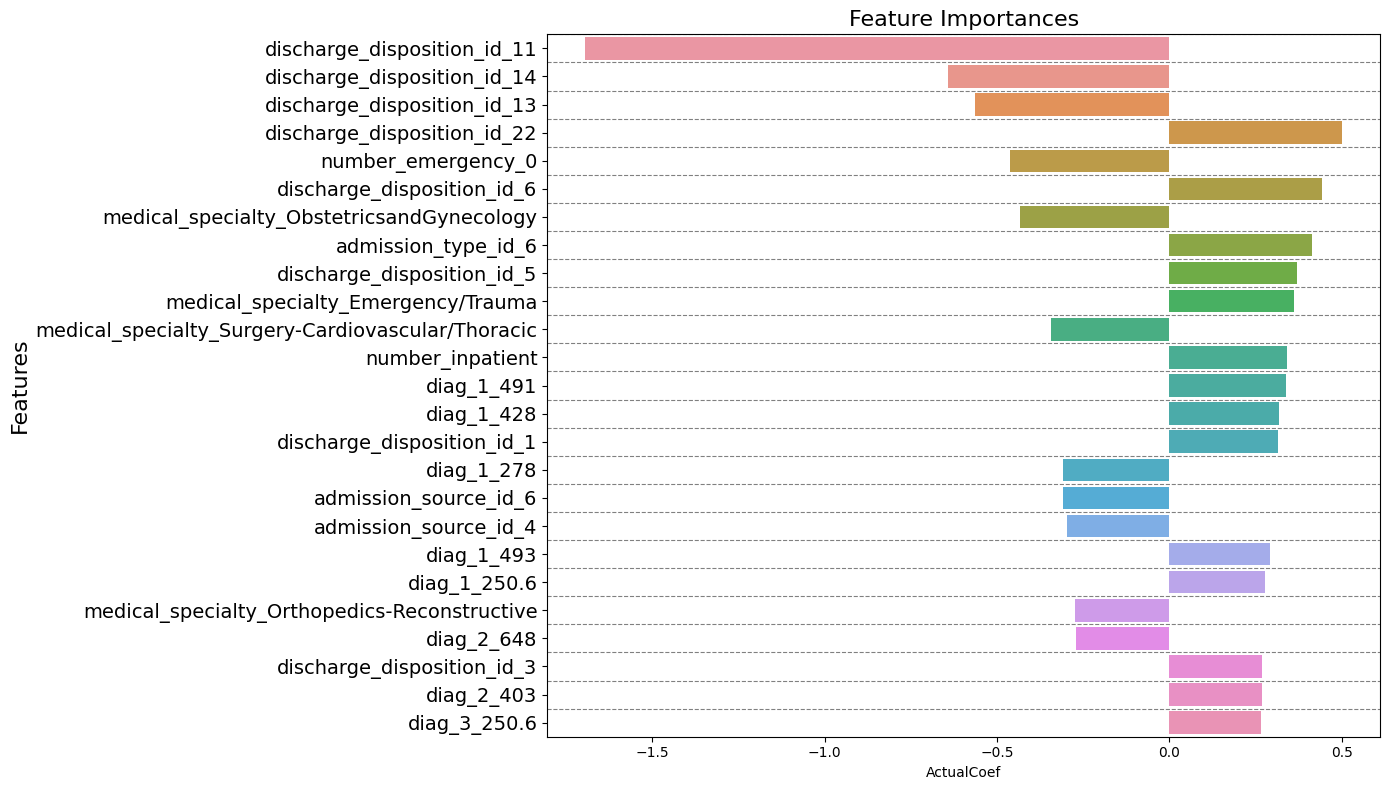

In [98]:
# Calculate feature importances (absolute values of coefficients)
importances = np.abs(l2_C1.coef_[0])
features = X_semi.columns

# Create a DataFrame to hold feature importances and sort it
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df["ActualCoef"]=l2_C1.coef_[0]
importance_df=importance_df.sort_values(by='Importance', ascending=False).head(25)
importance_df=importance_df.head(150)
# importance_df = importance_df.sort_values(by='Importance', ascending=False).index

plt.figure(figsize=(14, 8))  

# Set the style to have a white background
plt.style.use('default')  # Use the default style
sns.barplot(y=importance_df["Feature"], x=importance_df["ActualCoef"])

plt.title('Feature Importances', fontsize=16) 
plt.ylabel('Features', fontsize=16) 

tick_positions = range(len(importance_df["Feature"]))
tick_labels = importance_df["Feature"]
plt.yticks(tick_positions, tick_labels, fontsize=14) 

for pos in tick_positions:
    plt.axhline(y=pos - 0.5, color='gray', linestyle='--', linewidth=0.8)

plt.tight_layout()

plt.show()


### Printing ROC curve

In [106]:
from sklearn.metrics import roc_curve, auc

# Predict the probability of the positive class
y_prob = l2_C1.predict_proba(X_test_sm)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_sm, y_prob)

roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for linear regression')
plt.legend(loc='lower right')
plt.show()


#### Comparing Orginal L1 to adjuste L1 with 

# Extra
# ----->  That was not used 

In [ ]:
# comparing 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities for L1 and L2 models
y_prob_SM = lr_noPenalty_SM.predict_proba(X_test)[:, 1]
y_prob_ = lr_noPenalty_Manual.predict_proba(X_test_sm)[:, 1]
y_prob_C_SM = l1_C1_SM.predict_proba(X_test)[:, 1]
y_prob_C_ = l1_C1.predict_proba(X_test_sm)[:, 1]

# Calculate the ROC
fpr_SM, tpr_SM, _ = roc_curve(y_test_sm, y_prob_SM)
roc_auc_SM = auc(fpr_SM, tpr_SM)

fpr_, tpr_, _ = roc_curve(y_test, y_prob_)
roc_auc_ = auc(fpr_, tpr_)

fpr_C_SM, tpr_C_SM, _ = roc_curve(y_test_C_sm, y_prob_SM)
roc_auc_C_SM = auc(fpr_SM, tpr_SM)

fpr_C, tpr_C, _ = roc_curve(y_test_C, y_prob_)
roc_auc_C = auc(fpr_C, tpr_C)




# Create the ROC curve plot
plt.figure(figsize=(10, 8))
plt.plot(fpr_SM, tpr_SM, color='darkorange', lw=2, label=f'ROC curve (lr_noPenalty_SM, AUC = {roc_auc_SM:.2f})')
plt.plot(fpr_, tpr_, color='blue', lw=2, label=f'ROC curve (lr_noPenalty_Manual, AUC = {roc_auc_:.2f})')
plt.plot(fpr_C_SM, tpr_C_SM, color='green', lw=2, label=f'ROC curve (l1_C1_SM, AUC = {roc_auc_C_SM:.2f})')
plt.plot(fpr_C, tpr_C, color='red', lw=2, label=f'ROC curve (l1_C1, AUC = {roc_auc_C:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc='lower right')
plt.show()



In [ ]:

from sklearn.metrics import roc_curve, auc

C_values = [0.001, 0.01, 0.1, 1, 10, 100]  
X_train, X_test, y_train, y_test = train_test_split(X_semi, y_semi, test_size=0.2, random_state=42, stratify=y)

# Initialize lists to store ROC curve data
roc_curves_l1 = []
roc_curves_l2 = []

# Fit logistic regression models with L1 and L2 regularization
l1_model = LogisticRegression(penalty='l1', C= ,solver='liblinear')
l2_model = LogisticRegression(penalty='l2', C=,solver='liblinear')

l1_model.fit(X_train, y_train)
l2_model.fit(X_train, y_train)

l1_y_prob = l1_model.predict_proba(X_test)[:, 1]
    fpr_l1, tpr_l1, _ = roc_curve(y_test, l1_y_prob)

    
    roc_curves_l1.append((fpr_l1, tpr_l1, C))
    roc_curves_l2.append((fpr_l2, tpr_l2, C))

plt.figure(figsize=(8, 6))
for fpr, tpr, C in roc_curves_l1:
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve (L1, C={C})')

# Plot ROC curves for L2
for fpr, tpr, C in roc_curves_l2:
    plt.plot(fpr, tpr, lw=2, linestyle='--', label=f'ROC curve (L2, C={C})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for L1 and L2 Regularization')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Using Manual update df
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_semi, y_semi, test_size=0.2, random_state=42, stratify=y)
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

class_report = classification_report(y_test, y_pred)


print(f'Classification Report:\n{class_report}')


+ remember ---> talk about using gender,race and age in data at the end

## Running Random Forest to replacing missing medical_specialty values

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import mean_squared_error, accuracy_score, f1_score

# # creating a list with all categorical varible excluding Medical specialty
# categorical_columns=list(dt.select_dtypes(include=['object']).columns)
# categorical_columns.remove("medical_specialty")

# # One-hot encode categorical columns
# data_encoded = pd.get_dummies(dt, columns=categorical_columns)

# #saving the hot encoded features with missing medical specialty for later
# unlabeled_X=data_encoded[data_encoded["medical_specialty"].isnull()].drop("medical_specialty",axis=1)
# print(unlabeled_X.shape," Missing variables medical_specialty")

# # Removing all the rows with Medical Specialty missing
# data_encoded=data_encoded.dropna(subset=["medical_specialty"])
# print(data_encoded.shape, " without Missing variables medical_specialty")

# X_=data_encoded.drop("medical_specialty", axis=1)
# y_=data_encoded["medical_specialty"]

# X_train,X_test, Y_train, Y_test=train_test_split(X_,y_, test_size=0.2, random_state=42)
# rm=RandomForestClassifier()

# rm.fit(X_train, Y_train)

# pr=rm.predict(X_test)

# print('Accuracy:',accuracy_score(Y_test, pr))

In [ ]:
# # Having built the model predict on the actual missing data
# missing_MS=rm.predict(unlabeled_X)
# missing_MS=list(missing_MS)

# # Replaced nul values with predicted values from Randm forest
# dt["medical_specialty"]=dt.apply(lambda row: missing_MS.pop(0) if pd.isna(row["medical_specialty"]) else row["medical_specialty"], axis=1)
# dt["medical_specialty"].isnull().mean() 

In [ ]:
# Medical_specialty is no longer has missing variables
dt.isnull().sum().to_frame(name='counts').query('counts > 0')

In [ ]:
#--> commented out it should be continuous, left as is
# Changing time in hospital to bins
# inputed_df['time_in_hospital']=pd.cut(inputed_df["time_in_hospital"], bins=[0, 2, 5, 10, np.inf], labels=["Short", "Medium", "Long", "Very Long"])